### Import Packages

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
!pip install dmba
from dmba import classificationSummary, gainsChart, liftChart
from sklearn.ensemble import RandomForestClassifier

### Open Files, Create DataFrames, Zero Null Values
#### *To keep nulls, comment 3rd var, remove "n" from dataframe var.

In [2]:
test = pd.read_csv("test.csv")
tsn = pd.DataFrame(test)
ts = tsn.fillna(0)

train = pd.read_csv("train.csv")
trn = pd.DataFrame(train)
tr = trn.fillna(0)

### Convert "LastRecord" and "Date Deployed" to Datetime

In [3]:
ts["LastRecord"], ts["Date Deployed"] = pd.to_datetime(ts["LastRecord"]), pd.to_datetime(ts["Date Deployed"])
tr["LastRecord"], tr["Date Deployed"] = pd.to_datetime(tr["LastRecord"]), pd.to_datetime(tr["Date Deployed"])

### Create "DaysInService" Column, Convert from TimeDelta to Float for Plotting

In [4]:
ts["DaysInService"] = ts["LastRecord"] - ts["Date Deployed"]
ts["DaysInService"] = ts["DaysInService"].dt.days.astype("float64")
tr["DaysInService"] = tr["LastRecord"] - tr["Date Deployed"]
tr["DaysInService"] = tr["DaysInService"].dt.days.astype("float64")

### Get Info and Head (Test)

In [5]:
ts.info()
ts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   deviceid                     4500 non-null   int64         
 1   avg_time_charging_lag1       4500 non-null   float64       
 2   avg_time_charging_lag2       4500 non-null   float64       
 3   avg_time_charging_lag3       4500 non-null   float64       
 4   avg_time_charging_lag7       4500 non-null   float64       
 5   charging_rate_lag3           4500 non-null   float64       
 6   charging_rate_lag7           4500 non-null   float64       
 7   avg_time_discharging_lag1    4500 non-null   float64       
 8   avg_time_discharging_lag2    4500 non-null   float64       
 9   avg_time_discharging_lag3    4500 non-null   float64       
 10  avg_time_discharging_lag7    4500 non-null   float64       
 11  discharging_rate_lag3        4500 non-null 

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,...,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,LastRecord,Date Deployed,DaysInService
0,42979,35.56,4.31,5.07,4.60,-0.033333,0.040000,66.29,3.77,4.07,...,346.301200,345.379600,17.481600,27.721600,4159.000000,12.437500,45.203200,2021-04-01,2019-09-08,571.0
1,14911,31.26,4.76,27.40,29.60,-0.076667,-0.060000,49.57,3.63,44.06,...,356.218261,357.305652,17.479130,27.650435,4163.608696,34.818182,45.129565,2021-04-01,2019-09-13,566.0
2,48386,30.08,5.07,4.76,4.74,0.013333,-0.016667,52.96,5.16,4.05,...,368.532667,366.844667,11.361333,16.739333,4176.133333,15.888889,28.100667,2021-04-01,2019-10-10,539.0
3,18822,33.31,32.79,5.09,4.96,0.000000,0.003333,49.26,68.54,5.83,...,352.899375,352.595000,17.168750,27.460625,4159.875000,12.750000,44.629375,2021-04-01,2019-10-13,536.0
4,49810,4.44,30.03,5.57,5.02,-0.200000,-0.030000,4.16,54.80,4.52,...,363.912800,365.208400,14.860000,23.980800,4168.400000,7.500000,38.840800,2021-04-01,2019-10-19,530.0


### Get Info and Head (Train)

In [6]:
#tr.info()
#tr.head()

### Count Null Values (Test)
#### *Keep nulls above to observe progressive linearity.

In [7]:
ts.isnull().sum()

deviceid                       0
avg_time_charging_lag1         0
avg_time_charging_lag2         0
avg_time_charging_lag3         0
avg_time_charging_lag7         0
charging_rate_lag3             0
charging_rate_lag7             0
avg_time_discharging_lag1      0
avg_time_discharging_lag2      0
avg_time_discharging_lag3      0
avg_time_discharging_lag7      0
discharging_rate_lag3          0
discharging_rate_lag7          0
charge_cycle_time_below_12     0
avg_time_charging_lag4         0
avg_time_discharging_lag4      0
avg_time_charging_lag5         0
avg_time_discharging_lag5      0
avg_time_charging_lag6         0
avg_time_discharging_lag6      0
avg_time_charging_lag8         0
avg_time_discharging_lag8      0
avg_time_charging_lag9         0
avg_time_discharging_lag9      0
avg_time_charging_lag10        0
avg_time_discharging_lag10     0
avg_time_charging_lag11        0
avg_time_discharging_lag11     0
avg_time_charging_lag12        0
avg_time_discharging_lag12     0
avg_time_c

### Count Null Values (Train)
#### *Keep nulls above to observe progressive linearity.

In [8]:
#tr.isnull().sum()

### Plot Distributions of DataFrame Columns
#### *no plot for "deviceid" (irrelevant) or "charge_cycle_time_below_12" (bool)
#### **uncomment to run

In [9]:
"""
for col in ts.columns[1:]:
    if col != "charge_cycle_time_below_12":
        hist = ts[col].hist(bins=10)
        print("Plot for column \"{}\"".format(col))
        plt.show()
"""

'\nfor col in ts.columns[1:]:\n    if col != "charge_cycle_time_below_12":\n        hist = ts[col].hist(bins=10)\n        print("Plot for column "{}"".format(col))\n        plt.show()\n'

### Create New DataFrame, Removing Columns Without Outliers

In [10]:
columns = [column for column in ts.columns if ts[column].dtype == "float64"]
tsno = ts[columns]

### Convert Outliers by Quantile to Null in New DataFrame.  Run Info and Head.

In [11]:
q_low = tsno[columns].quantile(0.01)
q_hi  = tsno[columns].quantile(0.99)

tsno_o = tsno[(tsno[columns] < q_hi) & (tsno[columns] > q_low)]

tsno_o.info()
tsno_o.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   avg_time_charging_lag1       4407 non-null   float64
 1   avg_time_charging_lag2       4407 non-null   float64
 2   avg_time_charging_lag3       4402 non-null   float64
 3   avg_time_charging_lag7       4407 non-null   float64
 4   charging_rate_lag3           4409 non-null   float64
 5   charging_rate_lag7           4410 non-null   float64
 6   avg_time_discharging_lag1    4410 non-null   float64
 7   avg_time_discharging_lag2    4410 non-null   float64
 8   avg_time_discharging_lag3    4410 non-null   float64
 9   avg_time_discharging_lag7    4410 non-null   float64
 10  discharging_rate_lag3        4410 non-null   float64
 11  discharging_rate_lag7        4410 non-null   float64
 12  avg_time_charging_lag4       4397 non-null   float64
 13  avg_time_dischargi

,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,...,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,DaysInService
0,35.56,NaN,5.07,4.60,-0.033333,0.040000,66.29,3.77,4.07,3.83,...,47.840000,3.640000,346.301200,345.379600,17.481600,27.721600,4159.000000,12.437500,45.203200,571.0
1,31.26,4.76,27.40,29.60,-0.076667,-0.060000,49.57,3.63,44.06,40.74,...,24.173913,2.826087,356.218261,357.305652,17.479130,27.650435,4163.608696,34.818182,45.129565,566.0
2,30.08,5.07,4.76,4.74,0.013333,-0.016667,52.96,5.16,4.05,4.22,...,10.333333,1.266667,368.532667,366.844667,11.361333,16.739333,4176.133333,15.888889,28.100667,539.0
3,33.31,32.79,5.09,4.96,0.000000,0.003333,49.26,68.54,5.83,4.78,...,16.625000,0.937500,352.899375,352.595000,17.168750,27.460625,4159.875000,12.750000,44.629375,536.0
4,4.44,30.03,5.57,5.02,-0.200000,-0.030000,4.16,54.80,4.52,4.62,...,1.000000,1.200000,363.912800,365.208400,14.860000,23.980800,4168.400000,7.500000,38.840800,530.0


### Count New Null *Outlier Values (Test No Outliers *tsno)

In [12]:
tsno_o.isnull().sum()

avg_time_charging_lag1          93
avg_time_charging_lag2          93
avg_time_charging_lag3          98
avg_time_charging_lag7          93
charging_rate_lag3              91
charging_rate_lag7              90
avg_time_discharging_lag1       90
avg_time_discharging_lag2       90
avg_time_discharging_lag3       90
avg_time_discharging_lag7       90
discharging_rate_lag3           90
discharging_rate_lag7           90
avg_time_charging_lag4         103
avg_time_discharging_lag4       92
avg_time_charging_lag5          96
avg_time_discharging_lag5       93
avg_time_charging_lag6          97
avg_time_discharging_lag6       94
avg_time_charging_lag8          91
avg_time_discharging_lag8       90
avg_time_charging_lag9          90
avg_time_discharging_lag9       90
avg_time_charging_lag10        148
avg_time_discharging_lag10     148
avg_time_charging_lag11        227
avg_time_discharging_lag11     227
avg_time_charging_lag12        367
avg_time_discharging_lag12     367
avg_time_charging_la

### Plot New DataFrame

## Dummy Coding

In [13]:
tr.dtypes

deviceid                                int64
avg_time_charging_lag1                float64
avg_time_charging_lag2                float64
avg_time_charging_lag3                float64
avg_time_charging_lag7                float64
charging_rate_lag3                    float64
charging_rate_lag7                    float64
avg_time_discharging_lag1             float64
avg_time_discharging_lag2             float64
avg_time_discharging_lag3             float64
avg_time_discharging_lag7             float64
discharging_rate_lag3                 float64
discharging_rate_lag7                 float64
fail_7                                  int64
charge_cycle_time_below_12               bool
avg_time_charging_lag4                float64
avg_time_discharging_lag4             float64
avg_time_charging_lag5                float64
avg_time_discharging_lag5             float64
avg_time_charging_lag6                float64
avg_time_discharging_lag6             float64
avg_time_charging_lag8            

In [14]:
tr = pd.get_dummies(tr,drop_first=True,prefix_sep='_') 
tr.columns

Index(['deviceid', 'avg_time_charging_lag1', 'avg_time_charging_lag2',
       'avg_time_charging_lag3', 'avg_time_charging_lag7',
       'charging_rate_lag3', 'charging_rate_lag7', 'avg_time_discharging_lag1',
       'avg_time_discharging_lag2', 'avg_time_discharging_lag3',
       'avg_time_discharging_lag7', 'discharging_rate_lag3',
       'discharging_rate_lag7', 'fail_7', 'charge_cycle_time_below_12',
       'avg_time_charging_lag4', 'avg_time_discharging_lag4',
       'avg_time_charging_lag5', 'avg_time_discharging_lag5',
       'avg_time_charging_lag6', 'avg_time_discharging_lag6',
       'avg_time_charging_lag8', 'avg_time_discharging_lag8',
       'avg_time_charging_lag9', 'avg_time_discharging_lag9',
       'avg_time_charging_lag10', 'avg_time_discharging_lag10',
       'avg_time_charging_lag11', 'avg_time_discharging_lag11',
       'avg_time_charging_lag12', 'avg_time_discharging_lag12',
       'avg_time_charging_lag13', 'avg_time_discharging_lag13',
       'avg_time_charging_

In [15]:
predictors = ['deviceid', 'avg_time_charging_lag1', 'avg_time_charging_lag2',
       'avg_time_charging_lag3', 'avg_time_charging_lag7',
       'charging_rate_lag3', 'charging_rate_lag7', 'avg_time_discharging_lag1',
       'avg_time_discharging_lag2', 'avg_time_discharging_lag3',
       'avg_time_discharging_lag7', 'discharging_rate_lag3',
       'discharging_rate_lag7', 'charge_cycle_time_below_12',
       'avg_time_charging_lag4', 'avg_time_discharging_lag4',
       'avg_time_charging_lag5', 'avg_time_discharging_lag5',
       'avg_time_charging_lag6', 'avg_time_discharging_lag6',
       'avg_time_charging_lag8', 'avg_time_discharging_lag8',
       'avg_time_charging_lag9', 'avg_time_discharging_lag9',
       'avg_time_charging_lag10', 'avg_time_discharging_lag10',
       'avg_time_charging_lag11', 'avg_time_discharging_lag11',
       'avg_time_charging_lag12', 'avg_time_discharging_lag12',
       'avg_time_charging_lag13', 'avg_time_discharging_lag13',
       'avg_time_charging_lag14', 'avg_time_discharging_lag14',
       'discharging_rate_lag4', 'discharging_rate_lag5',
       'discharging_rate_lag6', 'discharging_rate_lag8', 'charging_rate_lag4',
       'charging_rate_lag5', 'charging_rate_lag6', 'chargecycles',
       'dischargecycles', 'total_off_time', 'number_times_restart',
       'avg_volt_change_charging', 'avg_volt_change_discharging',
       'avg_time_charging', 'avg_time_discharging', 'max_voltage_day',
       'piececount', 'cycle_time',
       'DaysInService']
outcome = 'fail_7'

In [16]:
X = tr[predictors]
y = tr[outcome]
X.shape

(40500, 53)

## Logistic Regression

In [22]:
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear',class_weight = 'balanced')
logit_reg.fit(train_X, train_y)

LogisticRegression(C=1e+42, class_weight='balanced', solver='liblinear')

In [23]:
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns))

                                    coeff
deviceid                    -6.200970e-07
avg_time_charging_lag1       1.388149e-02
avg_time_charging_lag2       1.254912e-02
avg_time_charging_lag3       8.209855e-03
avg_time_charging_lag7       1.603587e-02
charging_rate_lag3           6.595695e-02
charging_rate_lag7          -1.935571e-02
avg_time_discharging_lag1   -7.752430e-03
avg_time_discharging_lag2   -6.374215e-03
avg_time_discharging_lag3   -3.677867e-03
avg_time_discharging_lag7   -7.645383e-03
discharging_rate_lag3        9.510256e-02
discharging_rate_lag7       -4.458692e-03
charge_cycle_time_below_12   1.679719e+00
avg_time_charging_lag4       4.553870e-03
avg_time_discharging_lag4   -1.073873e-03
avg_time_charging_lag5       9.049305e-03
avg_time_discharging_lag5   -3.443757e-03
avg_time_charging_lag6       1.348335e-02
avg_time_discharging_lag6   -6.268480e-03
avg_time_charging_lag8       9.868984e-03
avg_time_discharging_lag8   -4.022118e-03
avg_time_charging_lag9       7.791

charge_cycle_time_below_12 is the most important feature in this model. avg_time_charging and avg_time_discharging are the next most important features.

### Model Metrics

In [24]:
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.6136)

       Prediction
Actual     0     1
     0 12114  9648
     1  1306  5282
Confusion Matrix (Accuracy 0.6079)

       Prediction
Actual    0    1
     0 5134 4203
     1  561 2252


In [25]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_auc_score,classification_report, confusion_matrix
lr_prediction_train = logit_reg.predict_proba(train_X)[:,1] > 0.5
lr_prediction_valid = logit_reg.predict_proba(valid_X)[:,1] > 0.5
print("Accuracy on train is:",accuracy_score(train_y,lr_prediction_train))
print("Accuracy on test is:",accuracy_score(valid_y,lr_prediction_valid))
print("Precision_score train is:",precision_score(train_y,lr_prediction_train))
print("Precision_score on test is:",precision_score(valid_y,lr_prediction_valid))
print("Recall_score on train is:",recall_score(train_y,lr_prediction_train))
print("Recall_score on test is:",recall_score(valid_y,lr_prediction_valid))
print("f1_score on train is:",f1_score(train_y,lr_prediction_train))
print("f1_score on test is:",f1_score(valid_y,lr_prediction_valid))

Accuracy on train is: 0.6136155202821869
Accuracy on test is: 0.6079012345679012
Precision_score train is: 0.35378432685867384
Precision_score on test is: 0.34887683965917893
Recall_score on train is: 0.8017607771706132
Recall_score on test is: 0.8005687877710629
f1_score on train is: 0.4909378194999536
f1_score on test is: 0.48597324126025027


Recall is higher than other metrics for the logistric regression model. Precision is relatively low.

## Decision Tree

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

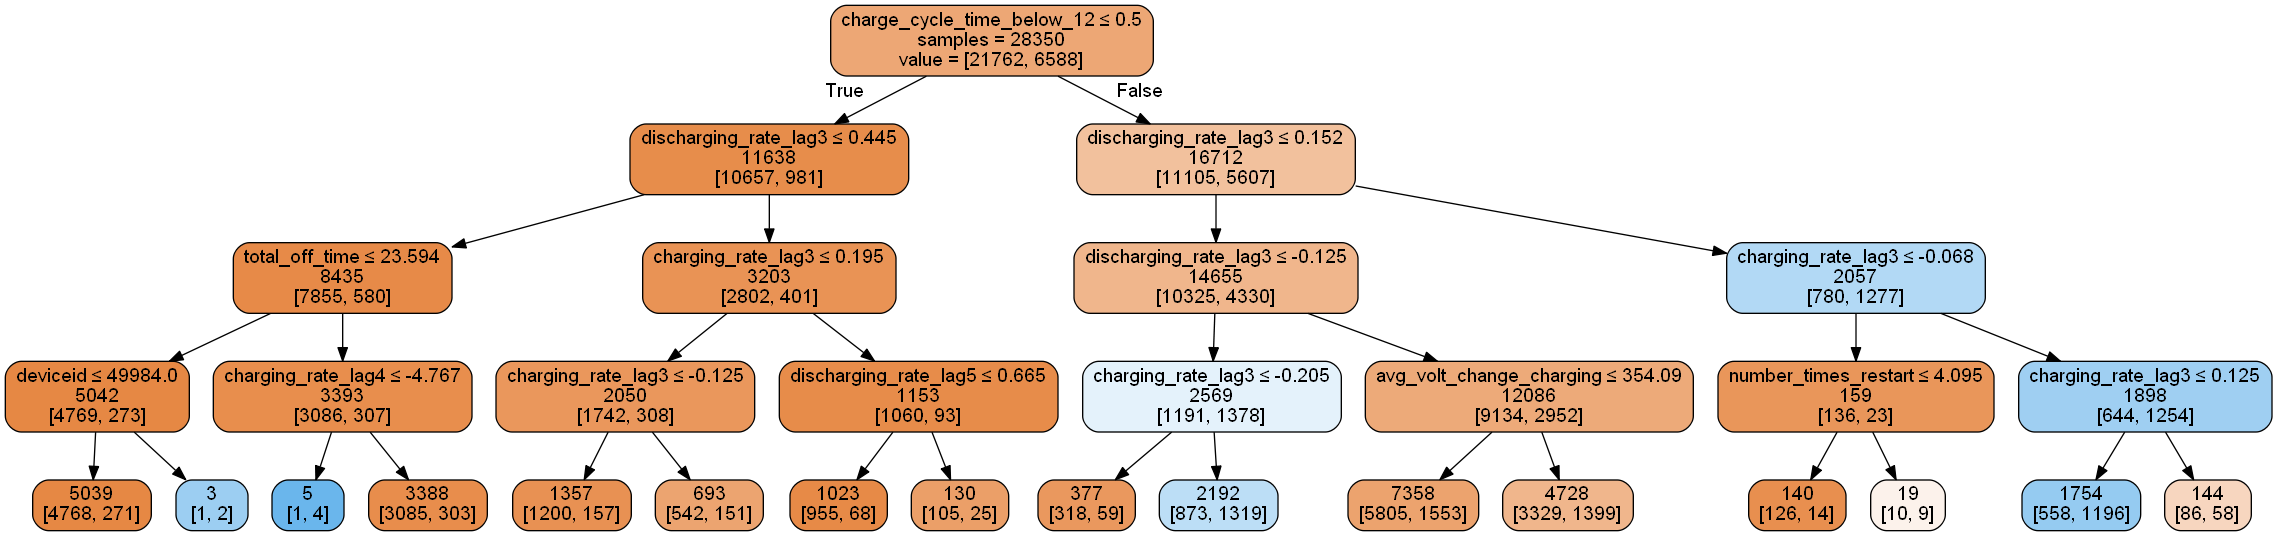

In [27]:
from sklearn.tree import DecisionTreeClassifier
from dmba import plotDecisionTree

DecisionTree = DecisionTreeClassifier(max_depth = 4)
DecisionTree.fit(train_X, train_y)

plotDecisionTree(DecisionTree, feature_names=train_X.columns)

### Feature Importance

In [28]:
importances = DecisionTree.feature_importances_

im = pd.DataFrame({'feature': train_X.columns, 'importance': importances})
im = im.sort_values('importance',ascending=False)
print(im)

                        feature  importance
13   charge_cycle_time_below_12    0.448717
11        discharging_rate_lag3    0.392954
5            charging_rate_lag3    0.125991
45     avg_volt_change_charging    0.021470
43               total_off_time    0.002775
38           charging_rate_lag4    0.002613
44         number_times_restart    0.002421
35        discharging_rate_lag5    0.001893
0                      deviceid    0.001167
39           charging_rate_lag5    0.000000
34        discharging_rate_lag4    0.000000
33   avg_time_discharging_lag14    0.000000
32      avg_time_charging_lag14    0.000000
31   avg_time_discharging_lag13    0.000000
30      avg_time_charging_lag13    0.000000
36        discharging_rate_lag6    0.000000
37        discharging_rate_lag8    0.000000
42              dischargecycles    0.000000
40           charging_rate_lag6    0.000000
41                 chargecycles    0.000000
28      avg_time_charging_lag12    0.000000
46  avg_volt_change_discharging 

### Model Metrics

In [29]:
dt_prediction_train = DecisionTree.predict(train_X) 
dt_prediction_valid = DecisionTree.predict(valid_X) 
    
print("Accuracy score on train is:",accuracy_score(train_y,dt_prediction_train))
print("Accuracy score on test is:",accuracy_score(valid_y,dt_prediction_valid))
print("Precision score on train is:",precision_score(train_y,dt_prediction_train))
print("Precision score on test is:",precision_score(valid_y,dt_prediction_valid))
print("Recall score on train is:",recall_score(train_y,dt_prediction_train))
print("Recall score on test is:",recall_score(valid_y,dt_prediction_valid))
print("F1 score on train is:",f1_score(train_y,dt_prediction_train))
print("F1 score on test is:",f1_score(valid_y,dt_prediction_valid))

Accuracy score on train is: 0.8059964726631393
Accuracy score on test is: 0.8052674897119342
Precision score on train is: 0.6375821952453212
Precision score on test is: 0.6310850439882698
Recall score on train is: 0.3826654523375835
Recall score on test is: 0.3825097760398151
F1 score on train is: 0.47827736672358184
F1 score on test is: 0.4763169544046038


Accuracy is higher than other metrics for the decision tree model. Recall is relatively low.

## Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(train_X, train_y)

# predict probabilities
prediction_train = nb.predict_proba(train_X)
prediction_valid = nb.predict_proba(valid_X)

### Model Metrics

In [31]:
nb_prediction_train = nb.predict(train_X) 
nb_prediction_valid = nb.predict(valid_X)

print("Accuracy on train is:",accuracy_score(train_y,nb_prediction_train)) 
print("Accuracy on test is:",accuracy_score(valid_y,nb_prediction_valid)) 
print("Precision_score train is:",precision_score(train_y,nb_prediction_train)) 
print("Precision_score on test is:",precision_score(valid_y,nb_prediction_valid)) 
print("Recall_score on train is:",recall_score(train_y,nb_prediction_train)) 
print("Recall_score on test is:",recall_score(valid_y,nb_prediction_valid)) 
print("f1_score on train is:",f1_score(train_y,nb_prediction_train)) 
print("f1_score on test is:",f1_score(valid_y,nb_prediction_valid))

Accuracy on train is: 0.618236331569665
Accuracy on test is: 0.6095473251028807
Precision_score train is: 0.33496999454446263
Precision_score on test is: 0.3279885978977374
Recall_score on train is: 0.6523982999392836
Recall_score on test is: 0.6544614290792748
f1_score on train is: 0.442659251248777
f1_score on test is: 0.4369807737953952


Recall is higher than other metrics for the naive bayes model. Precision is relatively low.

## Random Forest

In [32]:
rf = RandomForestClassifier(random_state=0)
cc_rf = rf.fit(train_X.values, train_y.values.ravel())

In [33]:
rf_prediction_train = cc_rf.predict(train_X)
rf_prediction_valid = cc_rf.predict(valid_X)

print("Accuracy on train is:",accuracy_score(train_y,rf_prediction_train))
print("Accuracy on test is:",accuracy_score(valid_y,rf_prediction_valid))
print("Precision_score train is:",precision_score(train_y,rf_prediction_train))
print("Precision_score on test is:",precision_score(valid_y,rf_prediction_valid))
print("Recall_score on train is:",recall_score(train_y,rf_prediction_train))
print("Recall_score on test is:",recall_score(valid_y,rf_prediction_valid))
print("f1_score on train is:",f1_score(train_y,rf_prediction_train))
print("f1_score on test is:",f1_score(valid_y,rf_prediction_valid))

Accuracy on train is: 1.0
Accuracy on test is: 0.7988477366255144
Precision_score train is: 1.0
Precision_score on test is: 0.6969050160085379
Recall_score on train is: 1.0
Recall_score on test is: 0.2321365090650551
f1_score on train is: 1.0
f1_score on test is: 0.34826666666666667


There's an overfitting problem in this model since all scores from training set, which are close to 100%, are much higher than ones from test set.

## Gradient Boosted Trees

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(random_state=0)
gbm.fit(train_X, train_y)
gbm.predict(valid_X[:2])

array([0, 0], dtype=int64)

### Feature Importance

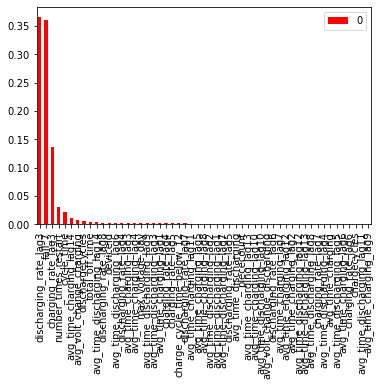

In [37]:
importances = list(zip(gbm.feature_importances_, tr.columns))
pd.DataFrame(importances, index=[x for (_,x) in importances]).sort_values(by = 0, ascending = False).plot(kind = 'bar', color = 'r')

Most important feature is discharging_rate_lag3

### Model Metrics

In [38]:
gbt_prediction_train = gbm.predict(train_X)
gbt_prediction_valid = gbm.predict(valid_X)

print("Accuracy on train is:",accuracy_score(train_y,gbt_prediction_train))
print("Accuracy on test is:",accuracy_score(valid_y,gbt_prediction_valid))
print("Precision_score train is:",precision_score(train_y,gbt_prediction_train))
print("Precision_score on test is:",precision_score(valid_y,gbt_prediction_valid))
print("Recall_score on train is:",recall_score(train_y,gbt_prediction_train))
print("Recall_score on test is:",recall_score(valid_y,gbt_prediction_valid))
print("f1_score on train is:",f1_score(train_y,gbt_prediction_train))
print("f1_score on test is:",f1_score(valid_y,gbt_prediction_valid))

Accuracy on train is: 0.818342151675485
Accuracy on test is: 0.814238683127572
Precision_score train is: 0.7043774872086412
Precision_score on test is: 0.682175622542595
Recall_score on train is: 0.3761384335154827
Recall_score on test is: 0.37006754354781374
f1_score on train is: 0.49040174153967947
f1_score on test is: 0.4798340631481908


Accuracy is higher than other metrics for the gradient boosted tree model. Recall is relatively low.

## Baseline AUC

In [51]:
from sklearn.metrics import roc_curve, auc
# LR
fpr, tpr, thresholds = roc_curve(train_y,lr_prediction_train)
print("LogisticRegression Train: ",str(auc(fpr, tpr)))
fpr, tpr, thresholds = roc_curve(valid_y,lr_prediction_valid)
print("LogisticRegression Valid: ",str(auc(fpr, tpr)),"\n")
# DT
fpr, tpr, thresholds = roc_curve(train_y,dt_prediction_train)
print("DecisionTree Train: ",str(auc(fpr, tpr)))
fpr, tpr, thresholds = roc_curve(valid_y,dt_prediction_valid)
print("DecisionTree Valid: ",str(auc(fpr, tpr)),"\n")
# NB
fpr, tpr, thresholds = roc_curve(train_y,nb_prediction_train)
print("NaiveBayes Train: ",str(auc(fpr, tpr)))
fpr, tpr, thresholds = roc_curve(valid_y,nb_prediction_valid)
print("NaiveBayes Valid: ",str(auc(fpr, tpr)),"\n")
# RF
fpr, tpr, thresholds = roc_curve(train_y,rf_prediction_train)
print("RandomForest Train: ",str(auc(fpr, tpr)))
fpr, tpr, thresholds = roc_curve(valid_y,rf_prediction_valid)
print("RandomForest Valid: ",str(auc(fpr, tpr)),"\n")
# GBT
fpr, tpr, thresholds = roc_curve(train_y,gbt_prediction_train )
print("GradientBoostedTree Train: ",str(auc(fpr, tpr)))
fpr, tpr, thresholds = roc_curve(valid_y,gbt_prediction_valid)
print("GradientBoostedTree Valid: ",str(auc(fpr, tpr)),"\n")
# NN
# fpr, tpr, thresholds = roc_curve(train_y,nn_prediction_train)
# print("NeuralNetworks Train: ",str(auc(fpr, tpr)))
# fpr, tpr, thresholds = roc_curve(valid_y,nn_prediction_valid)
# print("NeuralNetworkss Valid: ",str(auc(fpr, tpr)),"\n")


LogisticRegression Train:  0.679209586269343
LogisticRegression Valid:  0.6752121008577923 

DecisionTree Train:  0.6584083625992668
DecisionTree Valid:  0.6575716921325775 

NaiveBayes Train:  0.6301463974652763
NaiveBayes Valid:  0.6252386399974932 

RandomForest Train:  1.0
RandomForest Valid:  0.6008599435118571 

GradientBoostedTree Train:  0.6641743541532013
GradientBoostedTree Valid:  0.6590618321787478 



In [52]:
## ROC Curve Analysis

In [54]:
rf_proba = cc_rf.predict_proba(valid_X)[:,1]
rf_roc = roc_curve(valid_y, rf_proba)
rf_roc = pd.DataFrame(rf_roc)
gbm_proba=gbm.predict_proba(valid_X)[:,1]
gbm_roc = roc_curve(valid_y, gbm_proba)
gbm_roc = pd.DataFrame(gbm_roc)
# nn_proba = model.predict(valid_X_nn)
# nn_roc = roc_curve(valid_y_nn, nn_proba)
# nn_roc = pd.DataFrame(nn_roc)

                                                                                                  fpr  \
classifiers                                                                                             
LogisticRegression(C=1e+42, class_weight='balan...  [0.0, 0.0001071007818357074, 0.000428403127342...   
GaussianNB()                                        [0.0, 0.0, 0.0002142015636714148, 0.0002142015...   
DecisionTreeClassifier(max_depth=4)                 [0.0, 0.0002142015636714148, 0.027417800149941...   

                                                                                                  tpr  \
classifiers                                                                                             
LogisticRegression(C=1e+42, class_weight='balan...  [0.0, 0.0, 0.0, 0.00035549235691432633, 0.0003...   
GaussianNB()                                        [0.0, 0.00035549235691432633, 0.00035549235691...   
DecisionTreeClassifier(max_depth=4)                 [0

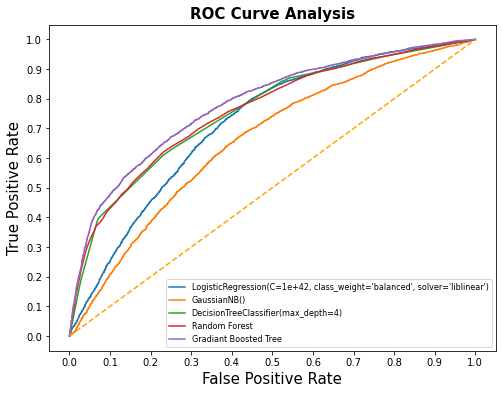

In [55]:
import sklearn.metrics as metrics
from sklearn.metrics import plot_roc_curve
%matplotlib inline
Classifier = [logit_reg,nb,DecisionTree]
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for cls in Classifier:
    yproba = cls.predict_proba(valid_X)[:,1]
    #plot_roc_curve(cls, valid_X, valid_y)
    fpr, tpr, thresholds = roc_curve(valid_y,  yproba)

    auc = roc_auc_score(valid_y, yproba)
    
    result_table = result_table.append({'classifiers':cls,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
result_table.set_index('classifiers', inplace=True)
#result_table.fillna(0)
fig = plt.figure(figsize=(8,6))

print(result_table.head())

for i in result_table.index:

    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'],
             label=i)
             #label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot(rf_roc.loc[0,:], rf_roc.loc[1,:], label="Random Forest")
plt.plot(gbm_roc.loc[0,:], gbm_roc.loc[1,:], label="Gradiant Boosted Tree")
# plt.plot(nn_roc.loc[0,:], nn_roc.loc[1,:], label="Neural Network")

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':8}, loc='lower right')

plt.show()

Gradient boosted tree and decision tree performed best. Random forest has overfitting. 

## Neural Networks

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scale=scaler.fit_transform(X)
X_scale.shape

(40500, 53)

In [42]:
y_tr = tr[[outcome]] # for neural network only because this model need to get y_df.shape[1]
train_X_nn, valid_X_nn, train_y_nn, valid_y_nn = train_test_split(X_scale, y_tr, test_size=0.3, random_state=1) 

In [ ]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model
input_layer = Input(shape=(X_scale.shape[1],))
dense_layer_1 = Dense(16, activation='relu')(input_layer)
dense_layer_2 = Dense(16, activation='relu')(dense_layer_1)
output = Dense(y_df.shape[1], activation='sigmoid')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])